In [59]:
# Using two late days from my allotted budget

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as LCM
from IPython.display import Latex
from __future__ import division

%matplotlib inline

* Load the data

In [2]:
dataA_train = np.loadtxt('../data/hwk2data/classificationA.train')
dataA_test = np.loadtxt('../data/hwk2data/classificationA.test')

dataB_train = np.loadtxt('../data/hwk2data/classificationB.train')
dataB_test = np.loadtxt('../data/hwk2data/classificationB.test')

dataC_train = np.loadtxt('../data/hwk2data/classificationC.train')
dataC_test = np.loadtxt('../data/hwk2data/classificationC.test')

* Create data matrices and label arrays

In [23]:
XA_train = dataA_train[:, 0:2]
yA_train = dataA_train[:, 2].astype(int)

XA_test = dataA_test[:, 0:2]
yA_test = dataA_test[:, 2].astype(int)

XB_train = dataB_train[:, 0:2]
yB_train = dataB_train[:, 2].astype(int)

XB_test = dataB_test[:, 0:2]
yB_test = dataB_test[:, 2].astype(int)

XC_train = dataC_train[:, 0:2]
yC_train = dataC_train[:, 2].astype(int)

XC_test = dataC_test[:, 0:2]
yC_test = dataC_test[:, 2].astype(int)

* Define constants

In [24]:
x0s = np.hstack((XA_train[:, 0], XB_train[:, 0], XC_train[:, 0]))
x1s = np.hstack((XA_train[:, 1], XB_train[:, 1], XC_train[:, 1]))

# min and max x, y values among all training datasets
X_MIN = np.floor(x0s.min())
X_MAX = np.ceil(x0s.max())
Y_MIN = np.floor(x1s.min())
Y_MAX = np.ceil(x1s.max())

# optimal figuresize 
i = 1
while True:
    L = (X_MAX - X_MIN) / i
    W = (Y_MAX - Y_MIN) / i
    if max((X_MAX - X_MIN) / i, (Y_MAX - Y_MIN) / i) <= 15:
        break
    i += 0.5
    
DELTA = 0.2
def make_meshgrid():
    """Creates a meshgrid"""
    xrange = np.arange(X_MIN, X_MAX, DELTA)
    yrange = np.arange(Y_MIN, Y_MAX, DELTA)
    return np.meshgrid(xrange,yrange)

N_POINTS = 50 # for drawing straight line 

# figure parameters
xlim = (X_MIN, X_MAX)
ylim = (Y_MIN, Y_MAX)
figsize = (L, W)

CMAP = LCM(['tab:gray', 'k']) # colormap for two classes

### 1. Generative Model (Fisher LDA)
#### (c) Implement the MLE for this model and apply it to each training dataset. For each dataset, represent graphically the data as a point cloud in $\mathbb{R}^2$ and the line defined by the equation $$p(\,y=1\,|\,x) = 0.5$$

* Define auxiliary functions to find the MLE parameters and the decision function

In [33]:
def lda_mle_params(X, y):
    """given data and labels, finds the MLE params for LDA"""
    assert np.ndim(X) == 2, "X to be a 2-dimensional numpy array"
    assert np.ndim(y) == 1, "Expect y to be an 1-dimensional numpy array"
    assert X.shape[0] == len(y), "Expect number of rows in X to match the length of y"
    assert set(y) == set([0,1]), "y cannot contain values other than 0 and 1"
    pi_ML = np.sum(y) / len(y)
    mu0_ML = np.dot((1-y).reshape(1,-1), X).ravel() / np.sum(1-y)
    mu1_ML = np.dot(y.reshape(1,-1), X).ravel() / np.sum(y)
    S0 = sum([(1-y)[i] * np.dot((X[i] - mu0_ML).reshape(-1,1), (X[i] - mu0_ML).reshape(1,-1)) for i in range(len(y))])
    S1 = sum([y[i] * np.dot((X[i] - mu1_ML).reshape(-1,1), (X[i] - mu1_ML).reshape(1,-1)) for i in range(len(y))])
    S_ML = (S0 + S1) / len(y)
    return pi_ML, mu0_ML, mu1_ML, S_ML

In [6]:
def lda_decision(x, pi, mu0, mu1, S):
    """given a data point and MLE labels, finds the value of the decision function for LDA on x"""
    S_inv = np.linalg.inv(S)
    return - np.log((1-pi)/pi) \
            - ((x-mu1).reshape(1,-1) @ S_inv @ (x-mu1).reshape(-1,1)).item() \
            + ((x-mu0).reshape(1,-1) @ S_inv @ (x-mu0).reshape(-1,1)).item() # z such that p(y=1|x) = sigmoid(z)

SyntaxError: invalid syntax (<ipython-input-6-4ff8184733e6>, line 4)

In [34]:
def lda_decision(x, pi, mu0, mu1, S):
    """given a data point and MLE labels, finds the value of the decision function for LDA on x"""
    S_inv = np.linalg.inv(S)
    return - np.log((1-pi)/pi) \
            - ((x-mu1).reshape(1,-1).dot(S_inv).dot((x-mu1).reshape(-1,1))).item() \
            + ((x-mu0).reshape(1,-1).dot(S_inv).dot((x-mu0).reshape(-1,1))).item() # z such that p(y=1|x) = sigmoid(z)

* Plot the three training datasets with decision boundary

In [35]:
def lda_plot(data, labels, title, save_fig=False):
    """Plots the data with LDA decision boundary"""
    pi, mu0, mu1, S = lda_mle_params(data, labels)
    # evaluate decision function on a meshgrid
    X0, X1 = make_meshgrid()
    Z = np.zeros(X0.shape)
    for i in range(X0.shape[0]):
        for j in range(X0.shape[1]):
            x = np.array([X0[i,j], X1[i,j]])
            Z[i,j] = lda_decision(x, pi, mu0, mu1, S)

    plt.figure(figsize=figsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([])
    plt.yticks([])
    plt.figtext(0.5, 0.95, '%s with LDA Decision Boundary' % title, fontsize=20, ha='center')
    plt.figtext(0.5, 0.92, '$\pi$ = %0.3f, $\mu_0$ = %s, $\mu_1$ = %s,' % 
                                (pi, str(np.round(mu0, 3)), str(np.round(mu1, 3))), fontsize=12,ha='center')
    plt.figtext(0.5, 0.89, '$\Sigma$ = %s' % str(np.round(S, 3)).replace('\n', ''), fontsize=12,ha='center')
    plt.scatter(data[:, 0], data[:, 1], s=18, c=labels, cmap=CMAP, marker='o')
    # p(y=1|x) = 0.5 corresponds to the level set of the decision function where the value is 0 
    plt.contour(X0, X1, Z, [0], colors='b', linewidths=1.5, linestyles='dashdot')
    if save_fig:
        plt.savefig('LDA_PLOT_' + title.replace(' ', '_'))

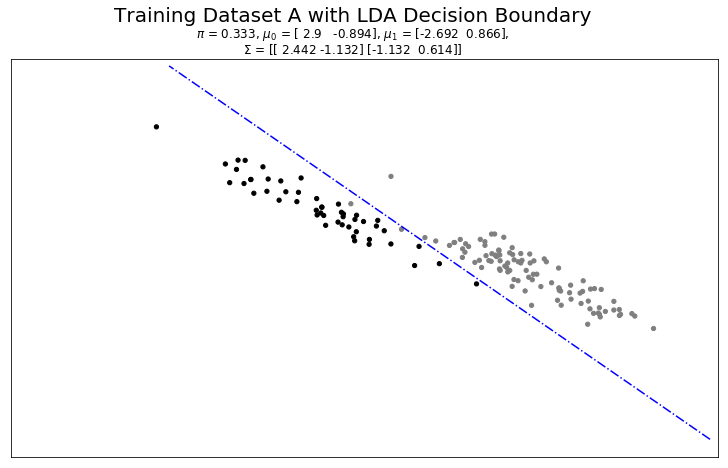

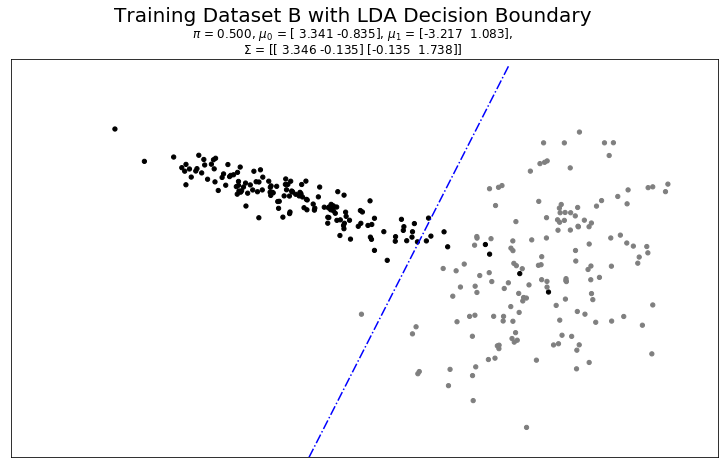

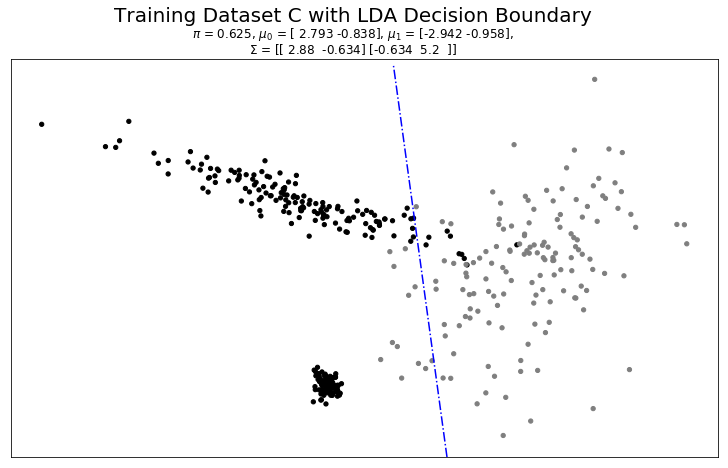

In [36]:
lda_plot(XA_train, yA_train, "Training Dataset A")
lda_plot(XB_train, yB_train, "Training Dataset B")
lda_plot(XC_train, yC_train, "Training Dataset C")


### 2. Logistic Regression: 
#### (a) Give the numerical values of the learnt parameters for each training dataset.

* Auxiliary functions

In [37]:
def sigm(z):
    # sigmoid function
    return (1 + np.exp(-z)) ** (-1)

def grad_log_likelihood(data, labels, w):
    """Computes the gradient of the loss function given the data, labels and weight"""
    X = np.hstack((data, np.ones((data.shape[0], 1)))) # add a dimension for bias
    pi = sigm((X @ w.reshape(-1,1)).ravel())
    return (X.T @ (labels - pi).reshape(-1,1)).ravel() # X^T (y - pi)

def hess_log_likelihood(data, labels, w):
    """Computes the hessian of the loss function given the data, labels and weight"""
    X = np.hstack((data, np.ones((data.shape[0], 1)))) # add a dimension for bias
    pi = sigm((X @ w.reshape(-1,1)).ravel())
    return - X.T @ np.diag(pi * (1 - pi)) @ X # - X^T * diag(pi*(1-pi)) * X

SyntaxError: invalid syntax (<ipython-input-37-604aca872406>, line 8)

In [38]:
def sigm(z):
    # sigmoid function
    return (1 + np.exp(-z)) ** (-1)

def grad_log_likelihood(data, labels, w):
    """Computes the gradient of the loss function given the data, labels and weight"""
    X = np.hstack((data, np.ones((data.shape[0], 1)))) # add a dimension for bias
    pi = sigm(np.dot(X, w.reshape(-1,1)).ravel())
    return np.dot(X.T, (labels - pi).reshape(-1,1)).ravel() # X^T (y - pi)

def hess_log_likelihood(data, labels, w):
    """Computes the hessian of the loss function given the data, labels and weight"""
    X = np.hstack((data, np.ones((data.shape[0], 1)))) # add a dimension for bias
    pi = sigm(np.dot(X, w.reshape(-1,1)).ravel())
    return - X.T.dot(np.diag(pi * (1 - pi))).dot(X) # - X^T * diag(pi*(1-pi)) * X

* Implement IRLS Algorithm

In [39]:
def irls(data, labels, eps=1e-6, gamma=1., max_iter=1000):
    """Implements the IRLS Algorithm and returns the optimal weights and bias"""
    w_old = np.array([np.inf] * (data.shape[1] + 1))
    # random wieghts and bias from [-0.2, 0.2]
    w = -0.2 + 0.4 * np.random.random_sample(data.shape[1] + 1)
    grad_norm = np.sum(grad_log_likelihood(data, labels, w) ** 2)
    diff_norm = np.sum((w - w_old) ** 2)
    i = 1
    while (min(diff_norm, grad_norm) >= eps) & (i < max_iter) : # no convergence yet
        w_old = w
        g = grad_log_likelihood(data, labels, w)
        H = hess_log_likelihood(data, labels, w)
        # lstsq is computationally cheaper than 
        # finding the inverse Hessian
        w = w - gamma * np.linalg.lstsq(H, g)[0]
        diff_norm = np.sum((w - w_old) ** 2)
        grad_norm = np.sum(grad_log_likelihood(data, labels, w) ** 2)
        i += 1
    return w[:-1], w[-1] # weight and bias

* Print the parameter values

In [41]:
print("Training Dataset A:\tweight = %s, bias = %0.3f" % 
              (str(np.round(irls(XA_train, yA_train)[0], 3)), irls(XA_train, yA_train)[1]))
print("Training Dataset B:\tweight = %s, bias = %0.3f" % 
              (str(np.round(irls(XB_train, yB_train)[0], 3)), irls(XB_train, yB_train)[1]))
print("Training Dataset C:\tweight = %s, bias = %0.3f" % 
              (str(np.round(irls(XC_train, yC_train)[0], 3)), irls(XC_train, yC_train)[1]))

Training Dataset A:	weight = [-182.207 -315.298], bias = -30.794
Training Dataset B:	weight = [-1.705  1.024], bias = 1.350
Training Dataset C:	weight = [-2.203  0.709], bias = 0.959


C:\Users\tapopriya\Miniconda2\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


#### (b) Represent graphically the data as a point cloud in $\mathbb{R}^2$ and the line defined by the equation: $p(y = 1\,|\,x) = 0.5$.

* Plot with decision boundary

In [42]:
def logreg_plot(data, labels, title, save_fig=False):
    """Plots the data with Logistic Regression decision boundary"""
    w, b = irls(data, labels)
    plt.figure(figsize=figsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([])
    plt.yticks([])
    plt.figtext(0.5, 0.92, '%s with Logistic Regression Decision Boundary' % title, fontsize=20, ha='center')
    plt.figtext(0.5, 0.89, '$w$ = %s, $b$ = %0.3f' % 
                                (str(np.round(w, 3)), b), fontsize=12,ha='center')
    plt.scatter(data[:, 0], data[:, 1], s=18, c=labels, cmap=CMAP, marker='o')
    # plot the line [w b]^T [x 1] = 0.
    x = np.linspace(X_MIN, X_MAX, N_POINTS)
    y = (0 - b - (w[0] * x)) / w[1]
    plt.plot(x, y, 'b-.')
    if save_fig:
        plt.savefig('LOGREG_PLOT_' + title.replace(' ', '_'))

C:\Users\tapopriya\Miniconda2\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


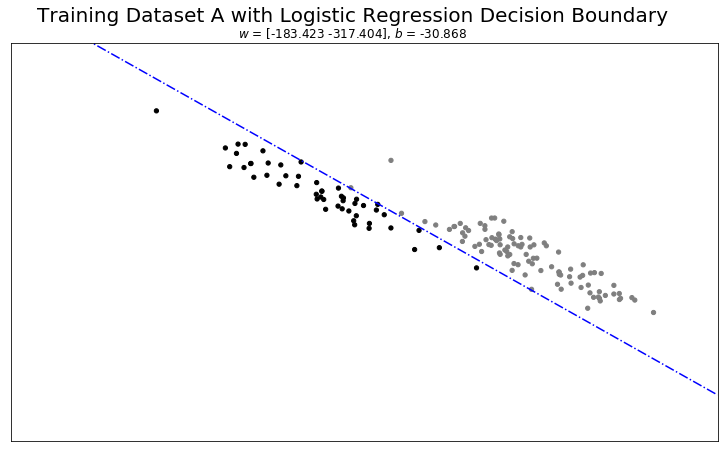

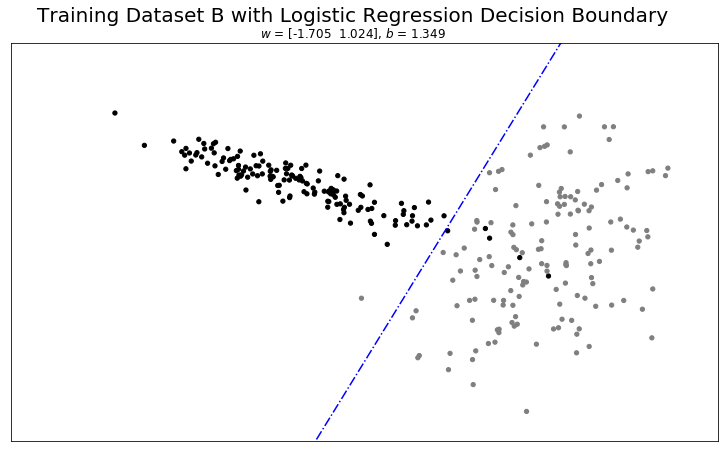

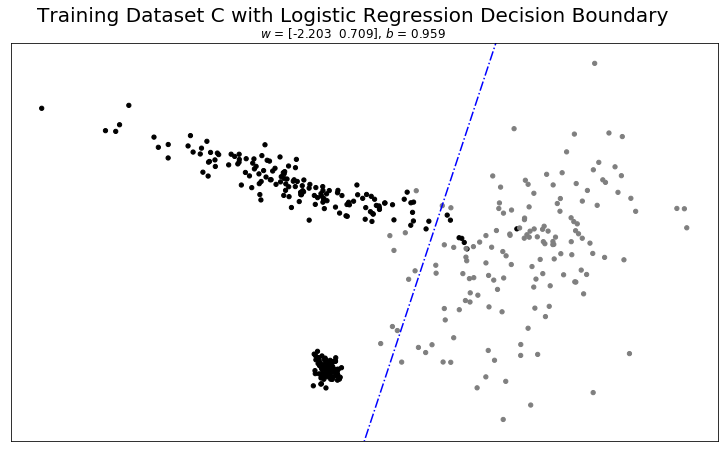

In [43]:
logreg_plot(XA_train, yA_train, "Training Dataset A")
logreg_plot(XB_train, yB_train, "Training Dataset B")
logreg_plot(XC_train, yC_train, "Training Dataset C")

### 3. Linear Regression
#### (a) Provide the numerical values of the learnt parameters. 

* Function to solve the normal equation

In [73]:
def linreg_params(data, labels):
    """Computes the weights and bias by solving the normal equations"""
    X = np.hstack((data, np.ones((data.shape[0],1)))) # add constant coordinate for bias
    w = (np.linalg.inv(X.T @ X) @ X.T @ labels.reshape(-1,1)).ravel() # (X^T X)^(-1) X^T y
    return w[:-1], w[-1] # weight and bias

* Print the parameter values

In [74]:
print("Training Dataset A:\tweight = %s, bias = %0.3f" % 
              (str(np.round(linreg_params(XA_train, yA_train)[0], 3)), linreg_params(XA_train, yA_train)[1]))
print("Training Dataset B:\tweight = %s, bias = %0.3f" % 
              (str(np.round(linreg_params(XB_train, yB_train)[0], 3)), linreg_params(XB_train, yB_train)[1]))
print("Training Dataset C:\tweight = %s, bias = %0.3f" % 
              (str(np.round(linreg_params(XC_train, yC_train)[0], 3)), linreg_params(XC_train, yC_train)[1]))

Training Dataset A:	weight = [-0.264 -0.373], bias = 0.492
Training Dataset B:	weight = [-0.104  0.052], bias = 0.500
Training Dataset C:	weight = [-0.128 -0.017], bias = 0.508


#### (b) Represent graphically the data as a point cloud in $\mathbb{R}^2$ and the line defined by the equation $f(x) = 0.5$

* Plot the datasets

In [75]:
def linreg_plot(data, labels, title, save_fig=False):
    """Plots the data with LDA decision boundary"""
    w, b = linreg_params(data, labels)
    plt.figure(figsize=figsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([])
    plt.yticks([])
    plt.figtext(0.5, 0.92, '%s with Linear Regression Decision Boundary' % title, fontsize=20, ha='center')
    plt.figtext(0.5, 0.89, '$w$ = %s, $b$ = %0.3f' % 
                                (str(np.round(w, 3)), b), fontsize=12,ha='center')
    plt.scatter(data[:, 0], data[:, 1], s=18, c=labels, cmap=CMAP, marker='o')
    # plot the line [w b]^T [x 1] = 0.5
    x = np.linspace(X_MIN, X_MAX, N_POINTS)
    y = (0.5 - b - (w[0] * x)) / w[1]
    plt.plot(x, y, 'b-.')
    if save_fig:
        plt.savefig('LINREG_PLOT_' + title.replace(' ', '_'))

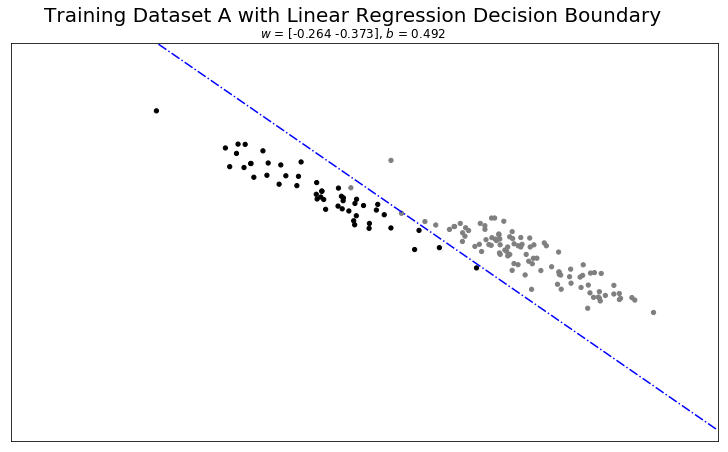

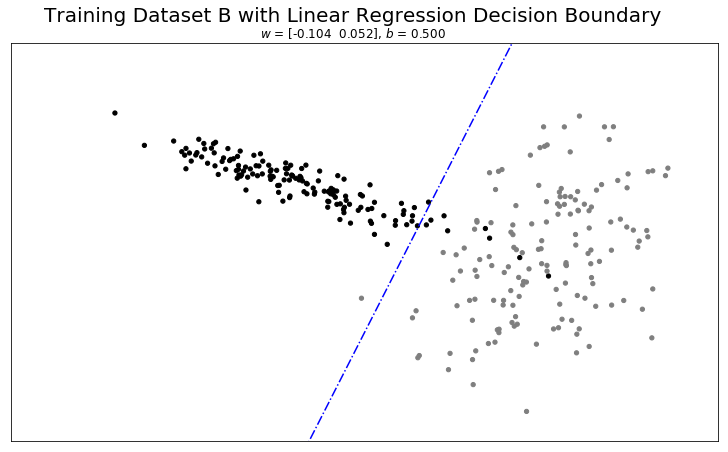

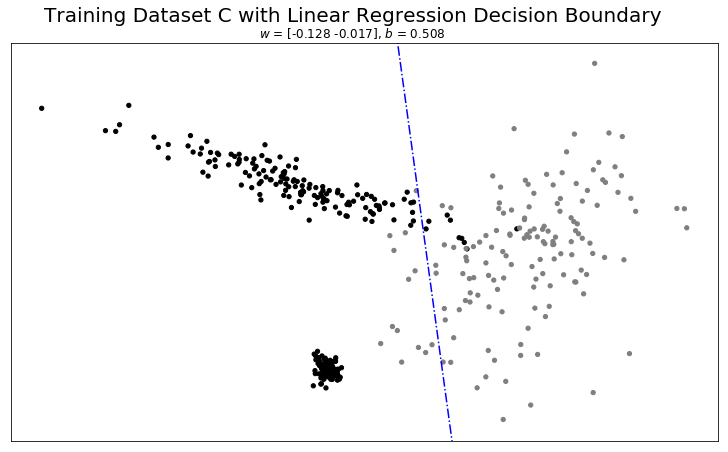

In [76]:
linreg_plot(XA_train, yA_train, "Training Dataset A")
linreg_plot(XB_train, yB_train, "Training Dataset B")
linreg_plot(XC_train, yC_train, "Training Dataset C")

### 4. Test the different models learnt from the corresponding training data on these test data.
#### (a) Compute for each model the misclassification error (i.e. the fraction of the data misclassified) on the training data and compute it as well on the test data.

* Auxiliary functions to print misclassification errors

In [77]:
def lda_miscls_error(train_data, train_labels, test_data, test_labels, title):
    """Finds the misclassification error for LDA predictions"""
    pi, mu0, mu1, S = lda_mle_params(train_data, train_labels)
    # if the value of the decision function is non-negative,
    # label as 1, else label 0
    train_pred = (np.array([lda_decision(train_data[i], pi, mu0, mu1, S) 
                            for i in range(train_data.shape[0])]) >= 0).astype(int)
    test_pred = (np.array([lda_decision(test_data[i], pi, mu0, mu1, S) 
                            for i in range(test_data.shape[0])]) >= 0).astype(int)
    # print the ratio of misclassified labels
    print("Misclassification Error for LDA Model:\t\tTraining %s = %0.3f,\tTest %s = %0.3f" % 
                  (title, len(np.where(train_labels != train_pred)[0]) / len(train_labels),
                   title, len(np.where(test_labels != test_pred)[0]) / len(test_labels)))
    
def logreg_miscls_error(train_data, train_labels, test_data, test_labels, title):
    """Finds the misclassification error for Logistic Regression predictions"""
    w, b = irls(train_data, train_labels)
    # if the value of the decision function is non-negative,
    # label as 1, else label 0
    train_pred = (b + (train_data @ w.reshape(-1,1)).ravel() >= 0).astype(int)
    test_pred = (b + (test_data @ w.reshape(-1,1)).ravel() >= 0).astype(int)
    # print the ratio of misclassified labels
    print("Misclassification Error for LogReg Model:\t\tTraining %s = %0.3f,\tTest %s = %0.3f" % 
                  (title, len(np.where(train_labels != train_pred)[0]) / len(train_labels),
                   title, len(np.where(test_labels != test_pred)[0]) / len(test_labels)))
    
def linreg_miscls_error(train_data, train_labels, test_data, test_labels, title):
    """Finds the misclassification error for Linear Regression predictions"""
    w, b = linreg_params(train_data, train_labels)
    # if the value of the decision function >= 0.5,
    # label as 1, else label 0
    train_pred = (b + (train_data @ w.reshape(-1,1)).ravel() >= 0.5).astype(int)
    test_pred = (b + (test_data @ w.reshape(-1,1)).ravel() >= 0.5).astype(int)
    # print the ratio of misclassified labels
    print("Misclassification Error for LinReg Model:\t\tTraining %s = %0.3f,\tTest %s = %0.3f" % 
                  (title, len(np.where(train_labels != train_pred)[0]) / len(train_labels),
                   title, len(np.where(test_labels != test_pred)[0]) / len(test_labels)))

* Misclassification Error for LDA Models:

In [78]:
lda_miscls_error(XA_train, yA_train, XA_test, yA_test, "Dataset A")
lda_miscls_error(XB_train, yB_train, XB_test, yB_test, "Dataset B")
lda_miscls_error(XC_train, yC_train, XC_test, yC_test, "Dataset C")

Misclassification Error for LDA Model:		Training Dataset A = 0.013,	Test Dataset A = 0.021
Misclassification Error for LDA Model:		Training Dataset B = 0.030,	Test Dataset B = 0.042
Misclassification Error for LDA Model:		Training Dataset C = 0.052,	Test Dataset C = 0.043


* Misclassification Error for Logistic Regression Models:

In [79]:
logreg_miscls_error(XA_train, yA_train, XA_test, yA_test, "Dataset A")
logreg_miscls_error(XB_train, yB_train, XB_test, yB_test, "Dataset B")
logreg_miscls_error(XC_train, yC_train, XC_test, yC_test, "Dataset C")

Misclassification Error for LogReg Model:		Training Dataset A = 0.000,	Test Dataset A = 0.035
Misclassification Error for LogReg Model:		Training Dataset B = 0.020,	Test Dataset B = 0.043
Misclassification Error for LogReg Model:		Training Dataset C = 0.040,	Test Dataset C = 0.023


* Misclassification Error for Linear Regression Models:

In [80]:
linreg_miscls_error(XA_train, yA_train, XA_test, yA_test, "Dataset A")
linreg_miscls_error(XB_train, yB_train, XB_test, yB_test, "Dataset B")
linreg_miscls_error(XC_train, yC_train, XC_test, yC_test, "Dataset C")

Misclassification Error for LinReg Model:		Training Dataset A = 0.013,	Test Dataset A = 0.021
Misclassification Error for LinReg Model:		Training Dataset B = 0.030,	Test Dataset B = 0.042
Misclassification Error for LinReg Model:		Training Dataset C = 0.055,	Test Dataset C = 0.042


### 5. QDA model
#### (a) Provide the numerical values of the learnt parameters.

* Define a function that returns the MLE parameters

In [81]:
def qda_mle_params(X, y):
    """given data and labels, finds the MLE params for QDA"""
    assert np.ndim(X) == 2, "X to be a 2-dimensional numpy array"
    assert np.ndim(y) == 1, "Expect y to be an 1-dimensional numpy array"
    assert X.shape[0] == len(y), "Expect number of rows in X to match the length of y"
    assert set(y) == set([0,1]), "y cannot contain values other than 0 and 1"
    pi_ML = np.sum(y) / len(y)
    mu0_ML = np.dot((1-y).reshape(1,-1), X).ravel() / np.sum(1-y)
    mu1_ML = np.dot(y.reshape(1,-1), X).ravel() / np.sum(y)
    # Sigma_0 = (1/sum_i (1 - y_i)) sum_i (1 - y_i) (x_i -mu_0) (x_i -mu_0)^T
    S0_ML = sum([(1-y)[i] * ((X[i] - mu0_ML).reshape(-1,1) @ (X[i] - mu0_ML).reshape(1,-1)) 
                 for i in range(len(y))]) / np.sum(1-y)
    # Sigma_1 = (1/sum_i y_i) sum_i y_i (x_i -mu_1) (x_i -mu_1)^T
    S1_ML = sum([y[i] * ((X[i] - mu1_ML).reshape(-1,1) @ (X[i] - mu1_ML).reshape(1,-1)) for i in range(len(y))]) / np.sum(y)
    return pi_ML, mu0_ML, mu1_ML, S0_ML, S1_ML

* Parameters for Training Dataset A

In [82]:
pi, mu0, mu1, S0, S1 = qda_mle_params(XA_train, yA_train)
Latex("$\qquad\pi$ = %0.3f, $\mu_0$ = %s, $\mu_1$ = %s, $\Sigma_0$ = %s, $\Sigma_1$ = %s"
         % (pi, str(np.round(mu0, 3)), str(np.round(mu1, 3)), str(np.round(S0, 3)), str(np.round(S1, 3))))

<IPython.core.display.Latex object>

* Parameters for Training Dataset B

In [83]:
pi, mu0, mu1, S0, S1 = qda_mle_params(XB_train, yB_train)
Latex("$\qquad\pi$ = %0.3f, $\mu_0$ = %s, $\mu_1$ = %s, $\Sigma_0$ = %s, $\Sigma_1$ = %s"
         % (pi, str(np.round(mu0, 3)), str(np.round(mu1, 3)), str(np.round(S0, 3)), str(np.round(S1, 3))))

<IPython.core.display.Latex object>

* Parameters for Training Dataset C

In [84]:
pi, mu0, mu1, S0, S1 = qda_mle_params(XC_train, yC_train)
Latex("$\qquad\pi$ = %0.3f, $\mu_0$ = %s, $\mu_1$ = %s, $\Sigma_0$ = %s, $\Sigma_1$ = %s"
         % (pi, str(np.round(mu0, 3)), str(np.round(mu1, 3)), str(np.round(S0, 3)), str(np.round(S1, 3))))

<IPython.core.display.Latex object>

#### (b) Represent graphically the data as well as the conic defined by $p(y = 1\,|\,x) = 0.5$ 

* Decision function for QDA

In [85]:
def qda_decision(x, pi, mu0, mu1, S0, S1):
    """given a data point and MLE labels, finds the value of the decision function for QDA on x"""
    S0_inv = np.linalg.inv(S0)
    S1_inv = np.linalg.inv(S1)
    return - np.log((1-pi)/pi) \
            - ((x-mu1).reshape(1,-1) @ S1_inv @ (x-mu1).reshape(-1,1)).item() \
            + ((x-mu0).reshape(1,-1) @ S0_inv @ (x-mu0).reshape(-1,1)).item() # z such that p(y=1|x) = sigmoid(z)

* Plot the datasets

In [86]:
def qda_plot(data, labels, title, save_fig=False):
    """Plots the data with LDA decision boundary"""
    X0, X1 = make_meshgrid()
    pi, mu0, mu1, S0, S1 = qda_mle_params(data, labels)
    Z = np.zeros(X0.shape)
    for i in range(X0.shape[0]):
        for j in range(X0.shape[1]):
            x = np.array([X0[i,j], X1[i,j]])
            Z[i,j] = qda_decision(x, pi, mu0, mu1, S0, S1)

    plt.figure(figsize=figsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([])
    plt.yticks([])
    plt.figtext(0.5, 0.95,'%s with QDA Decision Boundary' % title, fontsize=20, ha='center')
    plt.figtext(0.5, 0.92,'$\pi$ = %0.3f, $\mu_0$ = %s, $\mu_1$ = %s,' % 
                            (pi, str(np.round(mu0, 3)), str(np.round(mu1, 3))), fontsize=12,ha='center')
    plt.figtext(0.5, 0.89,'$\Sigma_0$ = %s, $\Sigma_1$ = %s' % (
                                str(np.round(S0, 3)).replace('\n', ''),
                                str(np.round(S1, 3)).replace('\n', '')
                                                                ), fontsize=12,ha='center')
    plt.scatter(data[:, 0], data[:, 1], s=18, c=labels, cmap=CMAP, marker='o')
    # p(y=1|x) = 0.5 corresponds to the level set of the decision function where the value is 0 
    plt.contour(X0, X1, Z, [0], colors='b', linewidths=1.5, linestyles='dashdot')
    if save_fig:
        plt.savefig('QDA_PLOT_' + title.replace(' ', '_'))

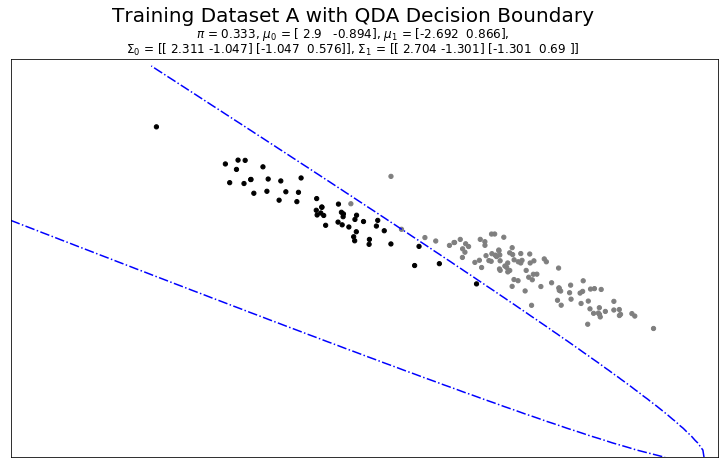

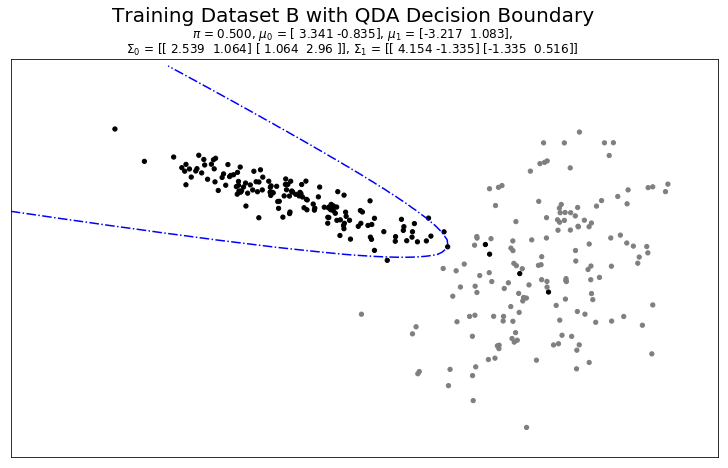

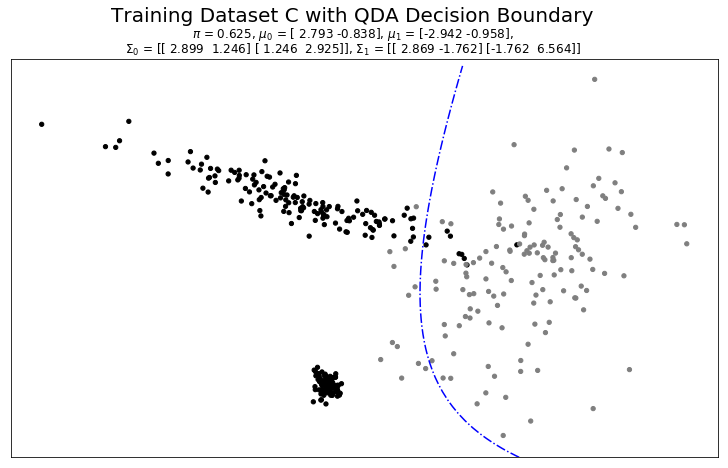

In [87]:
qda_plot(XA_train, yA_train, "Training Dataset A")
qda_plot(XB_train, yB_train, "Training Dataset B")
qda_plot(XC_train, yC_train, "Training Dataset C")

#### (c) Compute the misclassification error for QDA for both train and test data.

In [88]:
def qda_miscls_error(train_data, train_labels, test_data, test_labels, title):
    """Finds the misclassification error for QDA predictions"""
    pi, mu0, mu1, S0, S1 = qda_mle_params(train_data, train_labels)
    # if the value is non-negative, label it as 1, else 0
    train_pred = (np.array([qda_decision(train_data[i], pi, mu0, mu1, S0, S1) 
                            for i in range(train_data.shape[0])]) >= 0).astype(int)
    test_pred = (np.array([qda_decision(test_data[i], pi, mu0, mu1, S0, S1) 
                            for i in range(test_data.shape[0])]) >= 0).astype(int)
    print("Misclassification Error for QDA Model:\t\tTraining %s = %0.3f,\tTest %s = %0.3f" % 
                  (title, len(np.where(train_labels != train_pred)[0]) / len(train_labels),
                   title, len(np.where(test_labels != test_pred)[0]) / len(test_labels)))

In [89]:
qda_miscls_error(XA_train, yA_train, XA_test, yA_test, "Dataset A")
qda_miscls_error(XB_train, yB_train, XB_test, yB_test, "Dataset B")
qda_miscls_error(XC_train, yC_train, XC_test, yC_test, "Dataset C")

Misclassification Error for QDA Model:		Training Dataset A = 0.013,	Test Dataset A = 0.022
Misclassification Error for QDA Model:		Training Dataset B = 0.023,	Test Dataset B = 0.024
Misclassification Error for QDA Model:		Training Dataset C = 0.052,	Test Dataset C = 0.039
